In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('Titanic-Dataset.csv')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df['Age'] = df["Age"].fillna(df['Age'].mean()).astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df['Embarked'] = df['Embarked'].fillna(df["Embarked"].mode()[0])

In [48]:
df.shape

(891, 12)

In [49]:
df.drop('Cabin',axis=1,inplace=True)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [51]:
df['Name'].value_counts()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

In [52]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, drop=None)

sex_encoded = encoder.fit_transform(df[['Sex']])

sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))
df = df.drop(columns=['Sex'])
df = pd.concat([df, sex_encoded_df], axis=1)


In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0.0,1.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Sex_female   891 non-null    float64
 11  Sex_male     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [56]:
df['Sex_female'] = df['Sex_female'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Sex_female   891 non-null    int64  
 11  Sex_male     891 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 83.7+ KB


In [58]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [59]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
embarked_encoded = encoder.fit_transform(df[['Embarked']])

embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))
df = df.drop(columns=['Embarked'])
df = pd.concat([df, embarked_encoded_df], axis=1)


In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,108,22,1,0,523,7.2500,0,1,0.0,0.0,1.0
1,2,1,1,190,38,1,0,596,71.2833,1,0,1.0,0.0,0.0
2,3,1,3,353,26,0,0,669,7.9250,1,0,0.0,0.0,1.0
3,4,1,1,272,35,1,0,49,53.1000,1,0,0.0,0.0,1.0
4,5,0,3,15,35,0,0,472,8.0500,0,1,0.0,0.0,1.0


In [61]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int64  
 10  Sex_male     891 non-null    int64  
 11  Embarked_C   891 non-null    float64
 12  Embarked_Q   891 non-null    float64
 13  Embarked_S   891 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 97.6 KB


In [63]:
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    int64  
 10  Sex_male     891 non-null    int64  
 11  Embarked_C   891 non-null    int64  
 12  Embarked_Q   891 non-null    int64  
 13  Embarked_S   891 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.6 KB


In [64]:
df['Fare'] = df['Fare'].astype(int)

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,108,22,1,0,523,7,0,1,0,0,1
1,2,1,1,190,38,1,0,596,71,1,0,1,0,0
2,3,1,3,353,26,0,0,669,7,1,0,0,0,1
3,4,1,1,272,35,1,0,49,53,1,0,0,0,1
4,5,0,3,15,35,0,0,472,8,0,1,0,0,1


<Axes: >

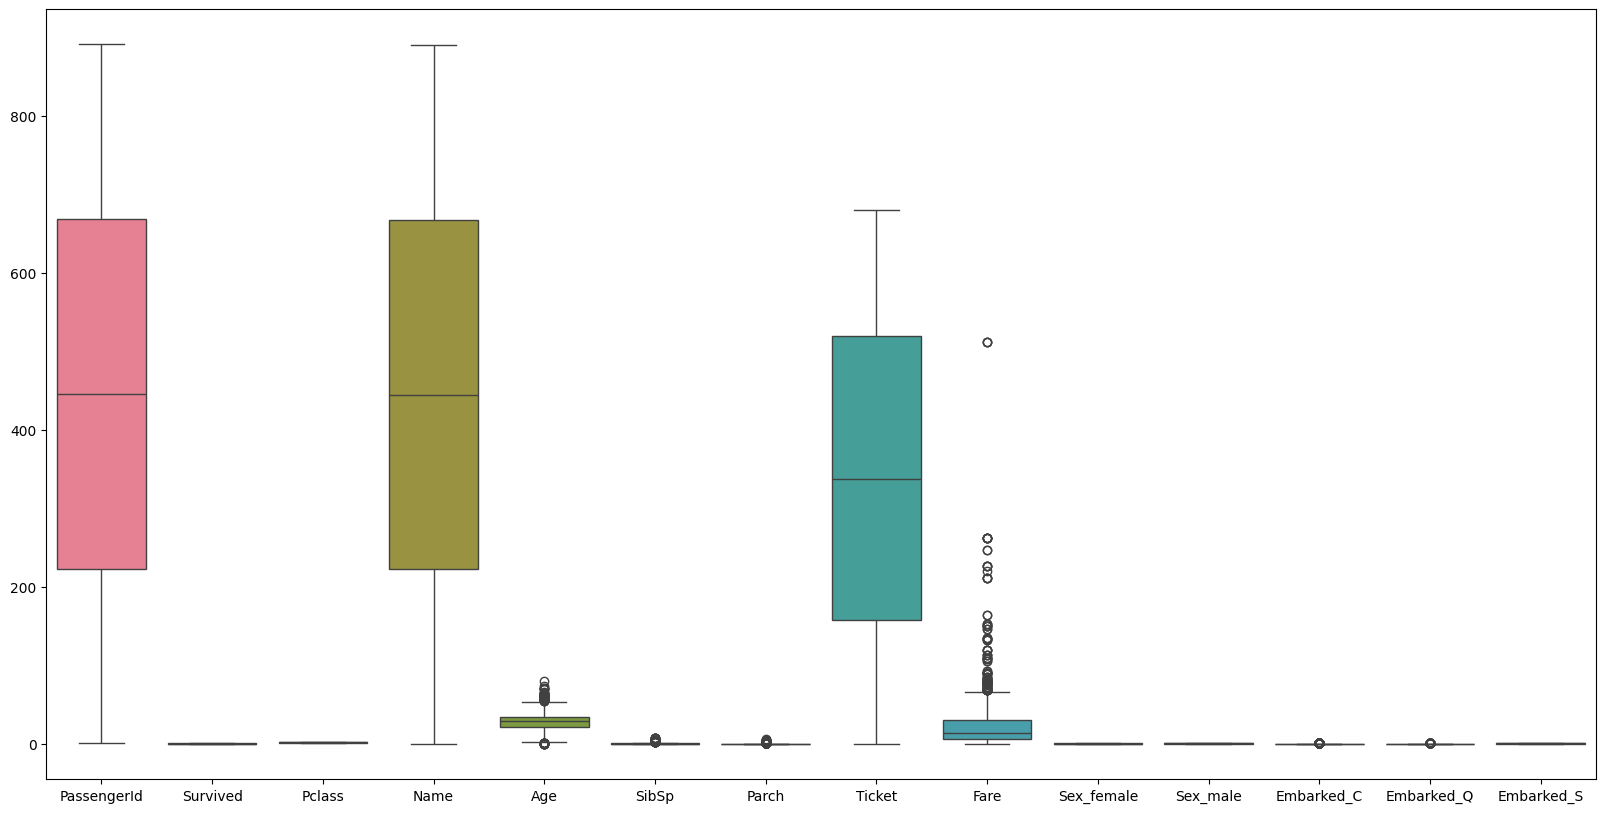

In [66]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [67]:
df.describe()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,29.544332,0.523008,0.381594,338.528620,31.785634,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,257.353842,13.013778,1.102743,0.806057,200.850657,49.703730,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,22.000000,0.000000,0.000000,158.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,445.000000,29.000000,0.000000,0.000000,337.000000,14.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,667.500000,35.000000,1.000000,0.000000,519.500000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,890.000000,80.000000,8.000000,6.000000,680.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

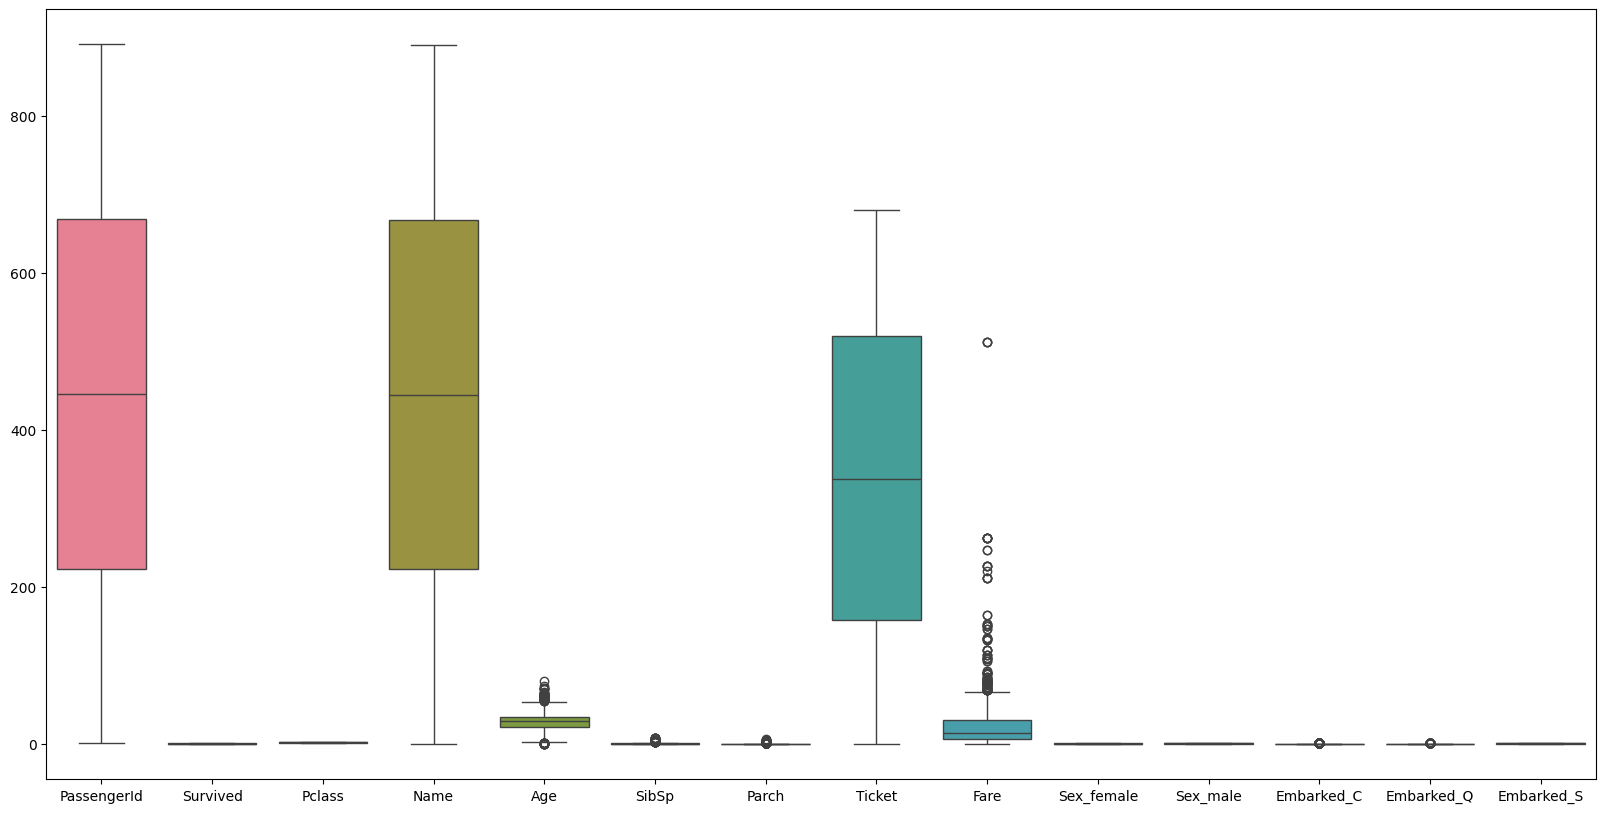

In [68]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(df)

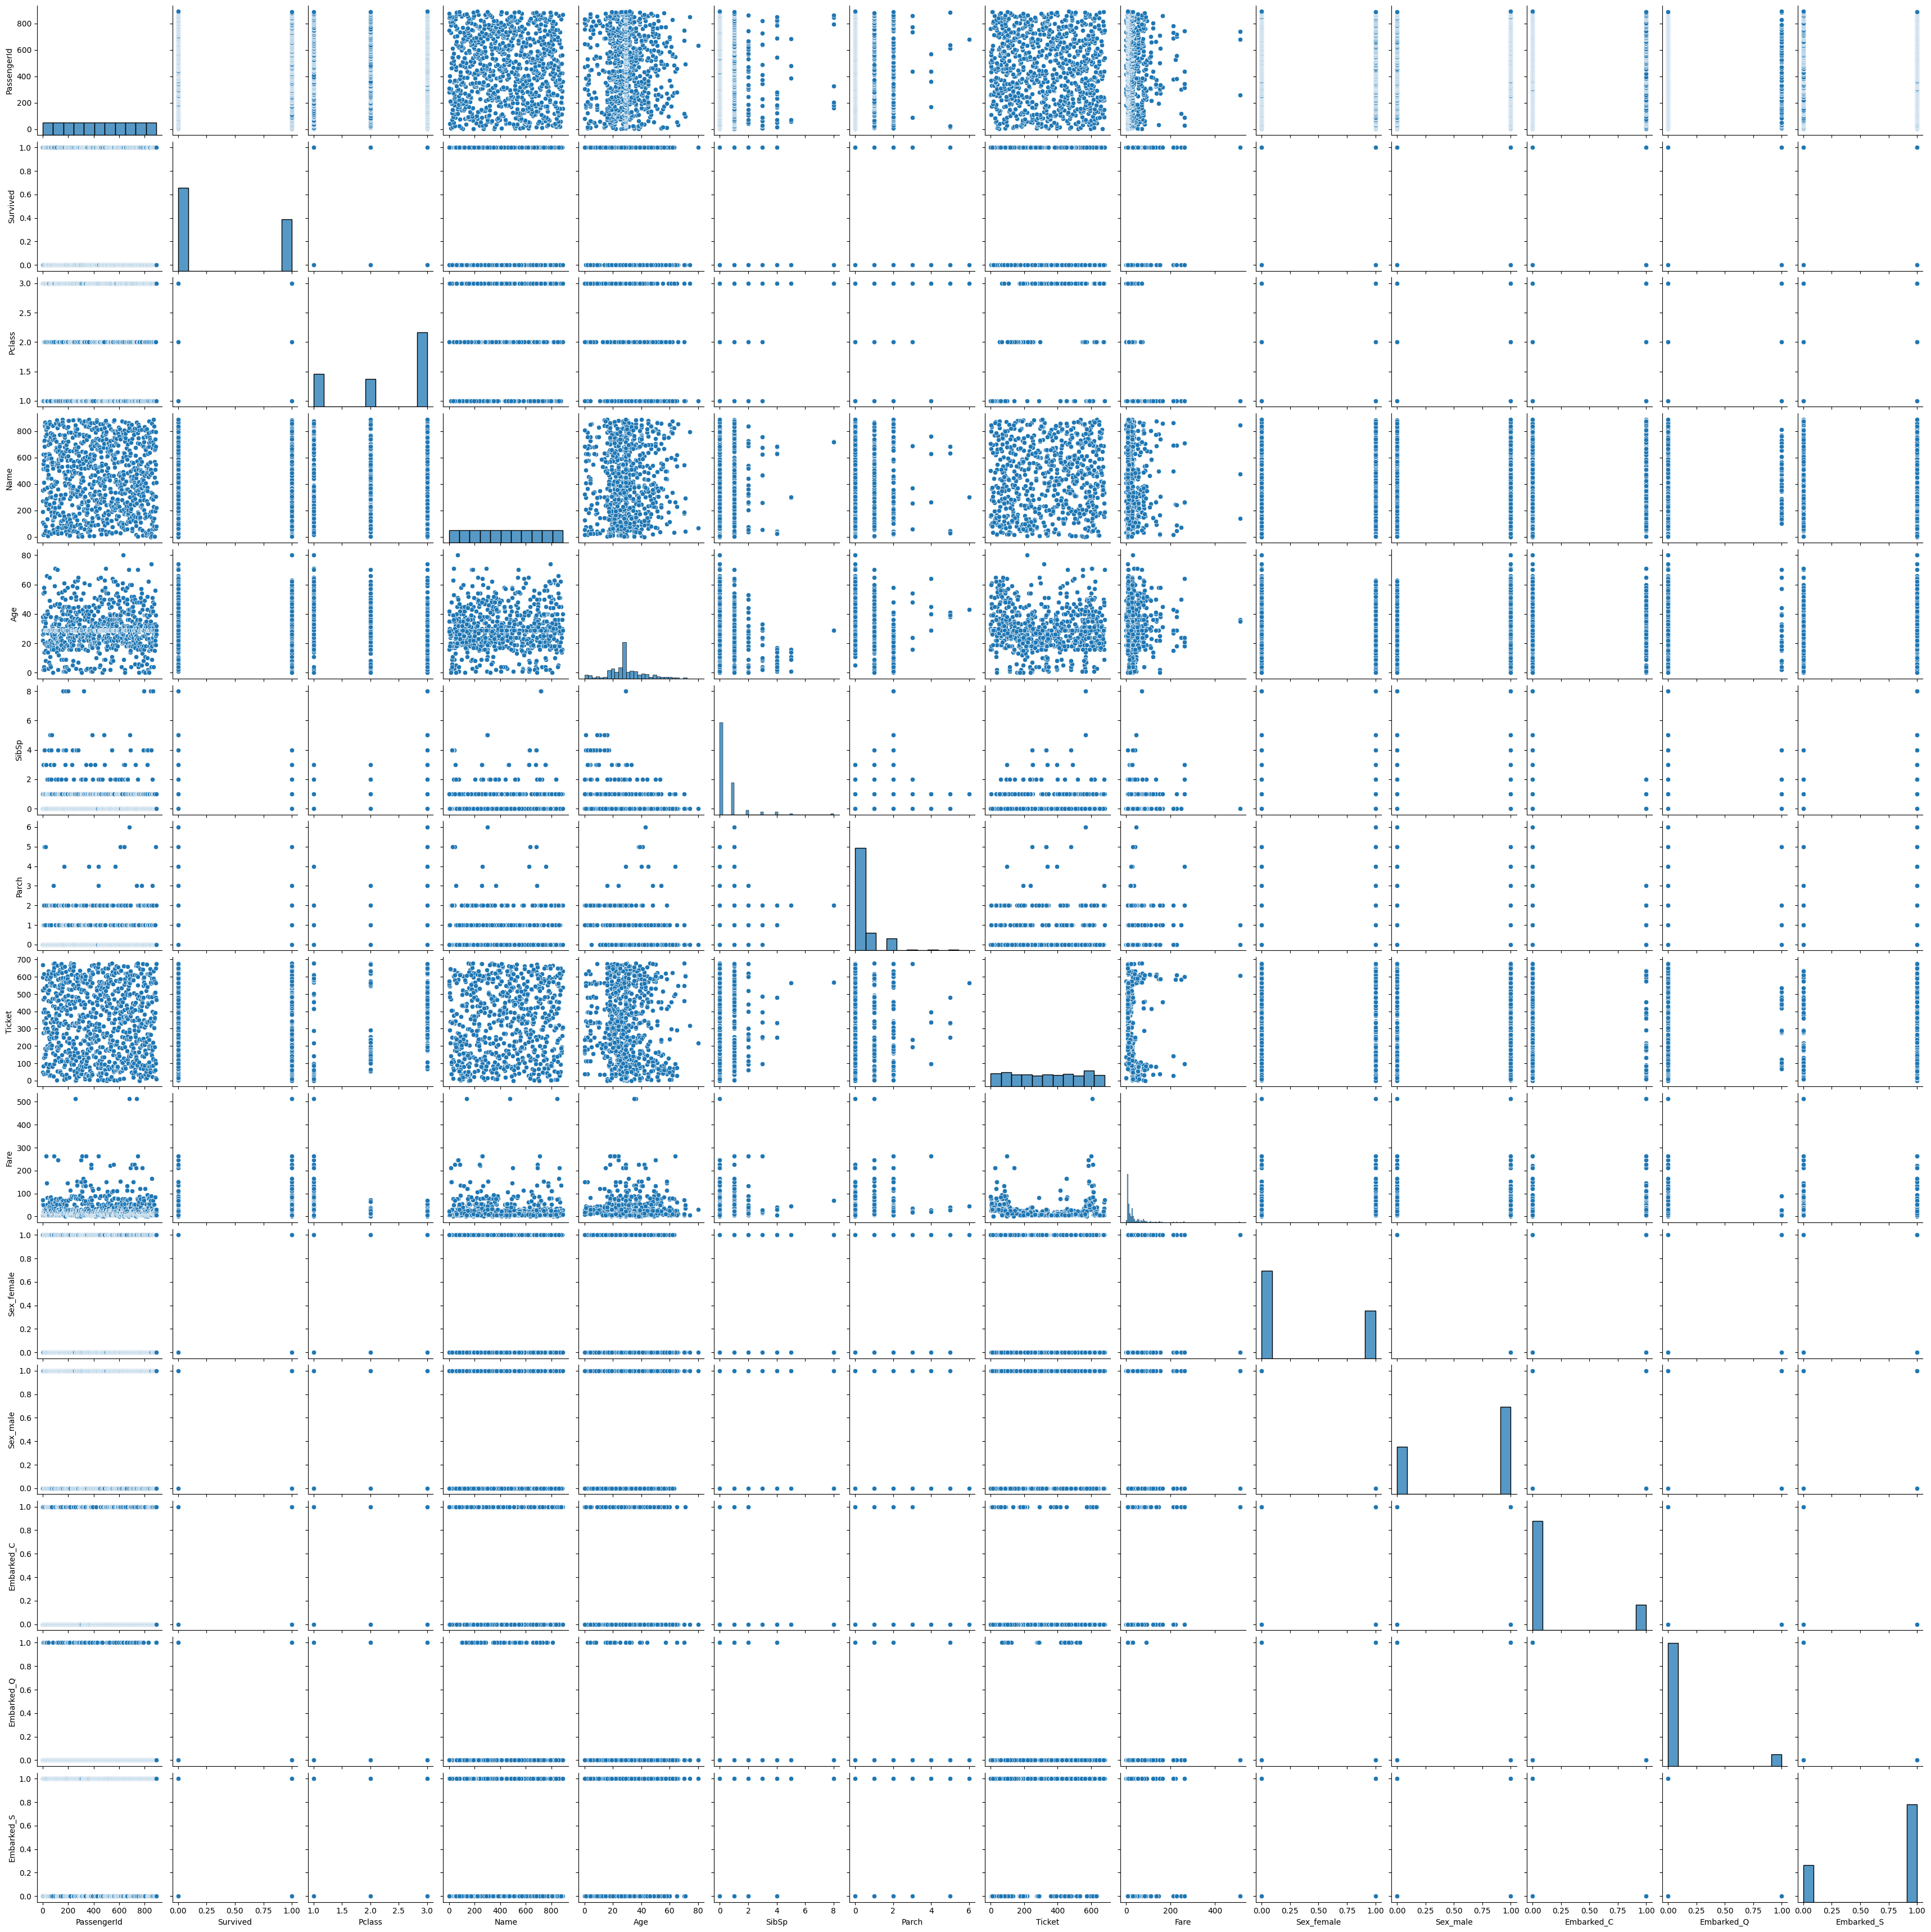

In [69]:
sns.pairplot(df)

In [70]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [71]:
numerical_features

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

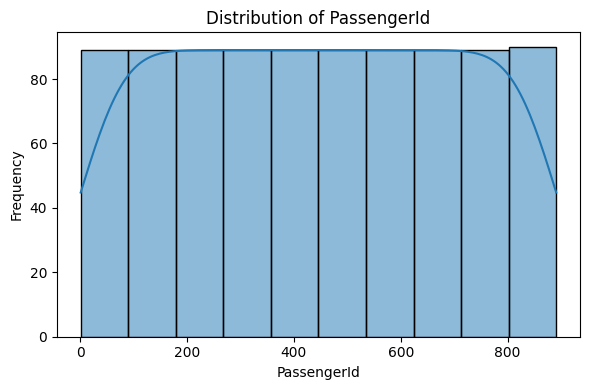

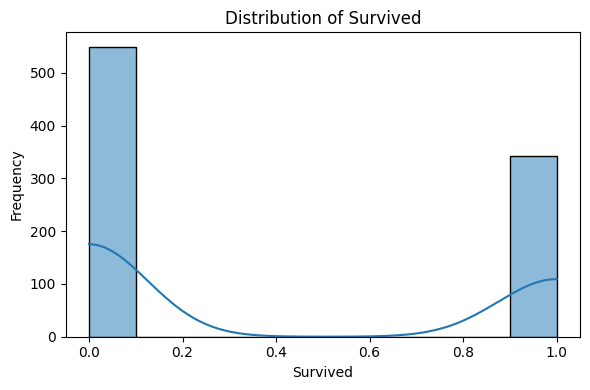

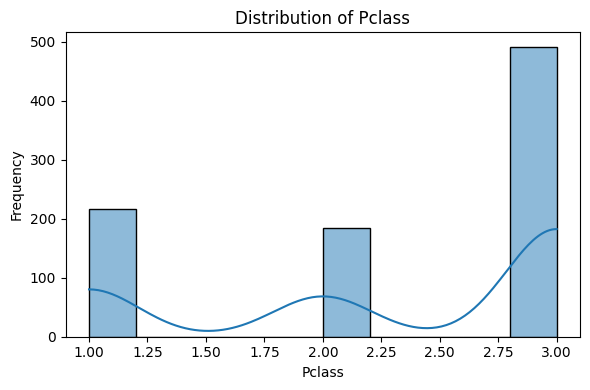

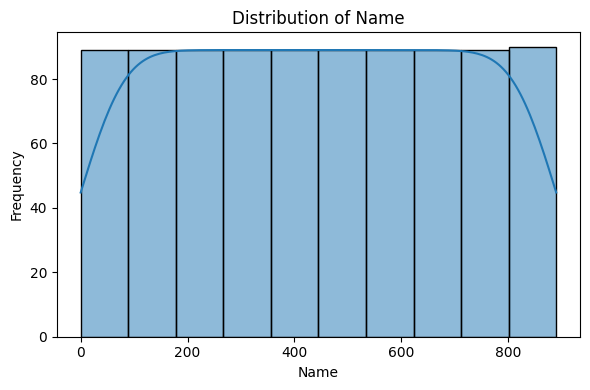

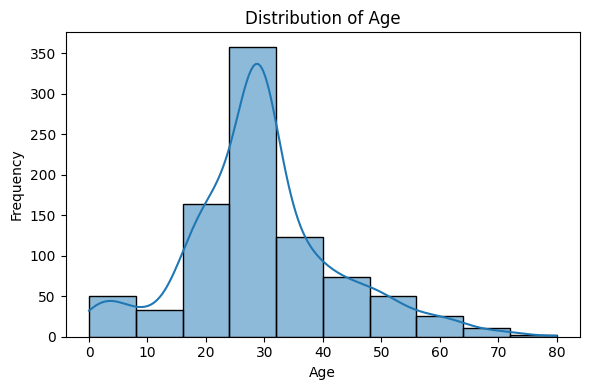

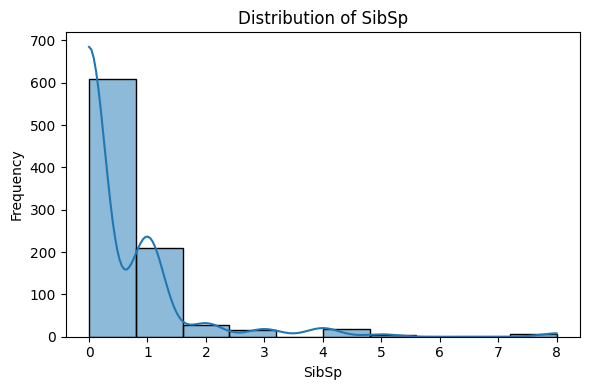

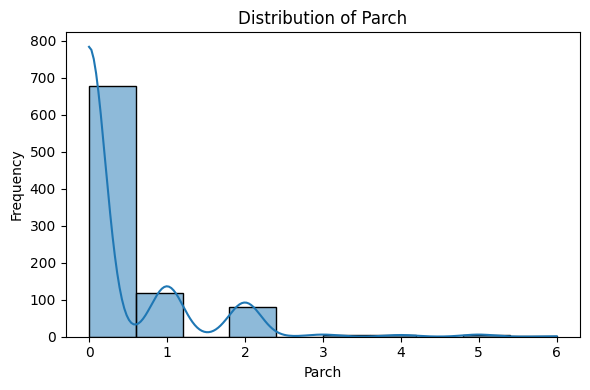

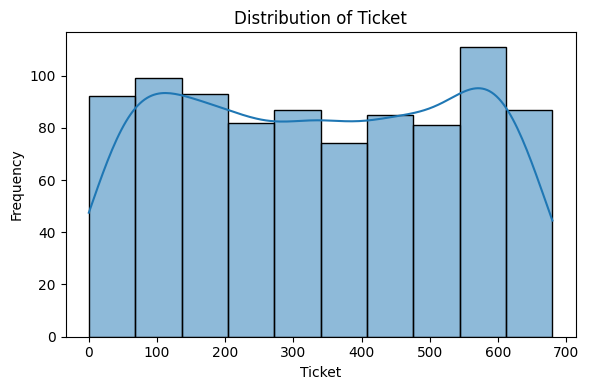

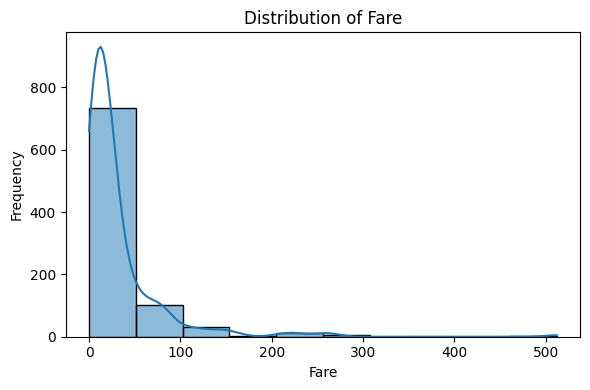

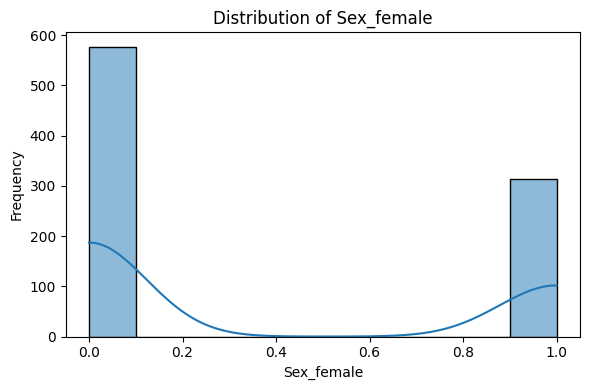

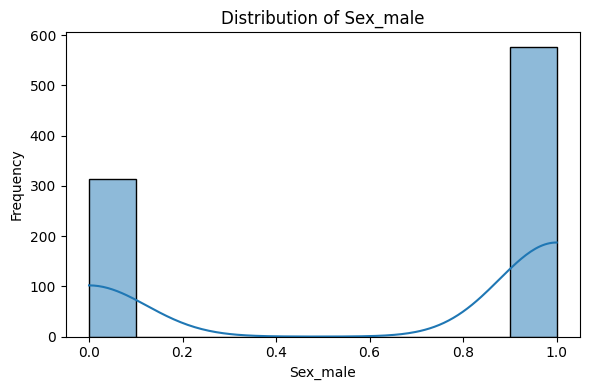

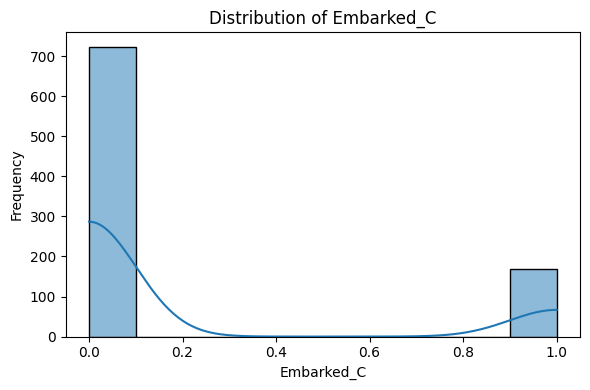

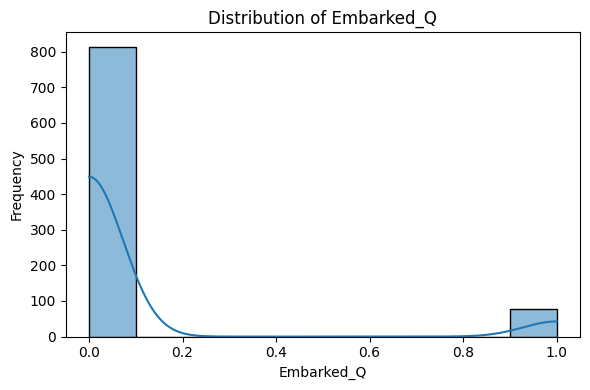

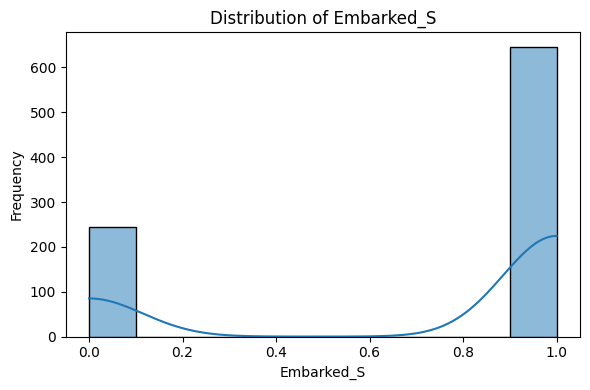

In [72]:

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, bins=10, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


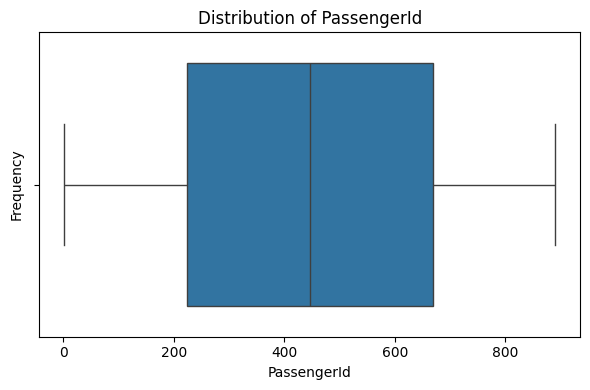

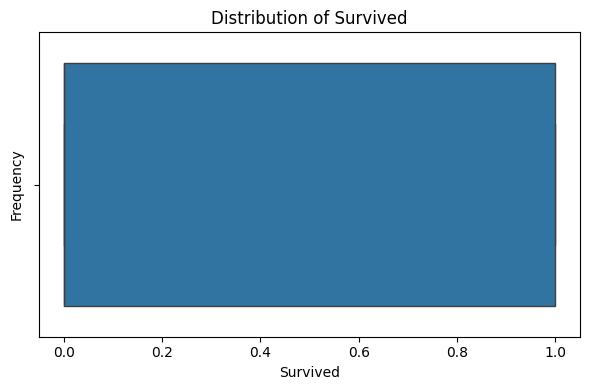

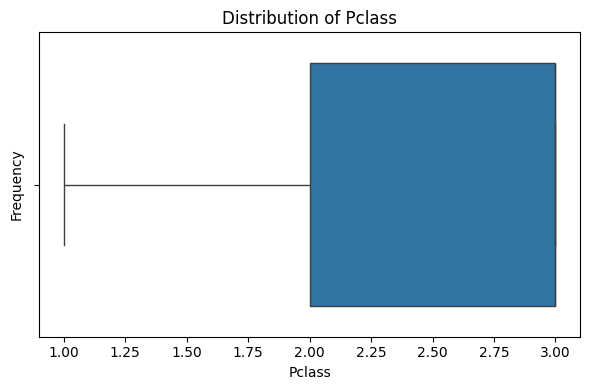

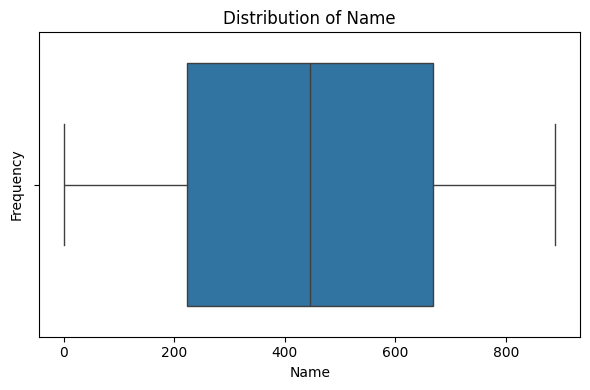

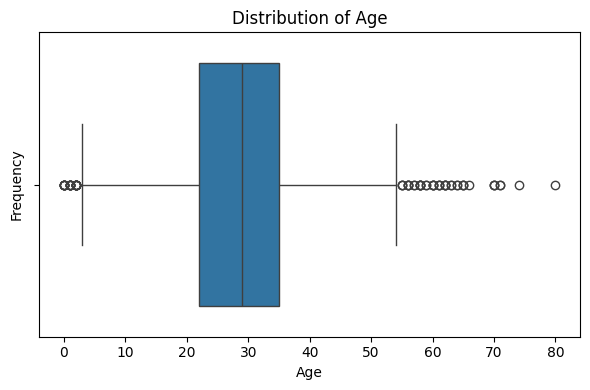

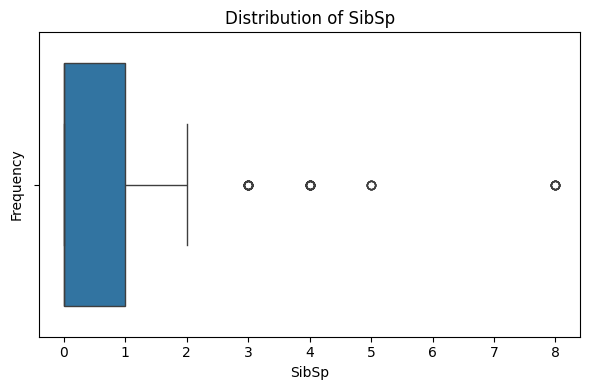

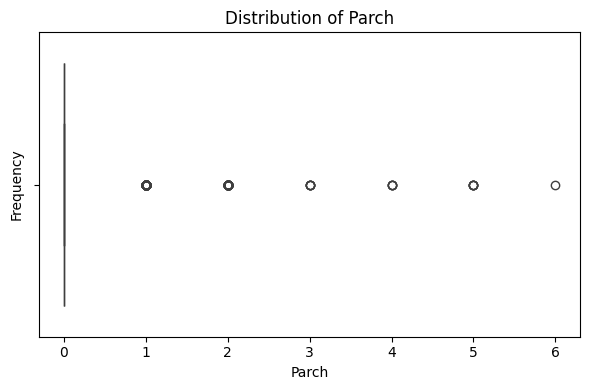

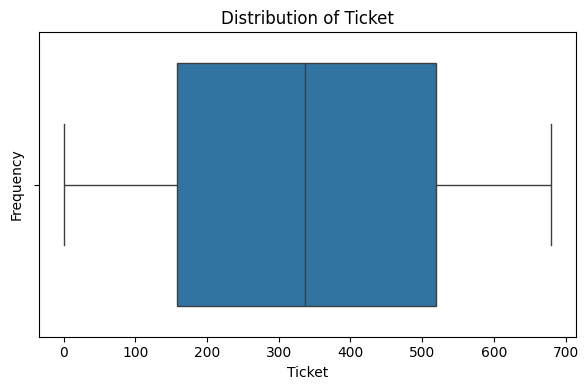

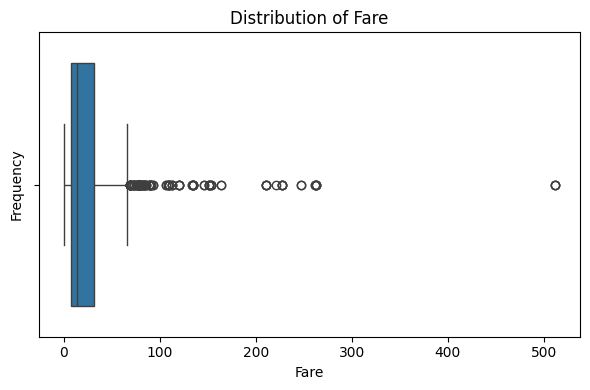

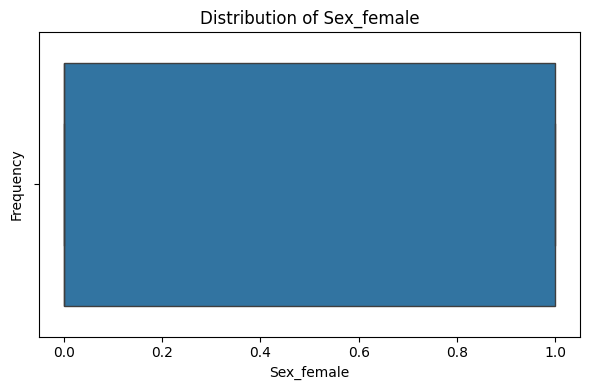

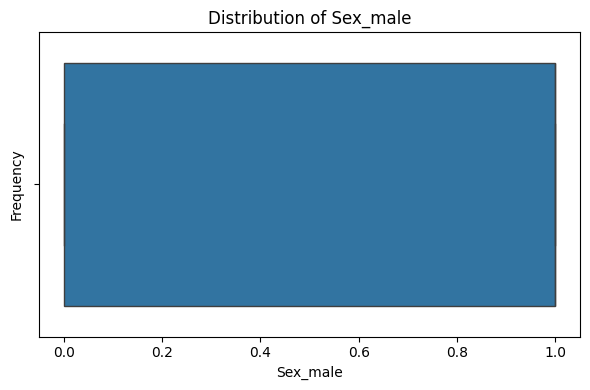

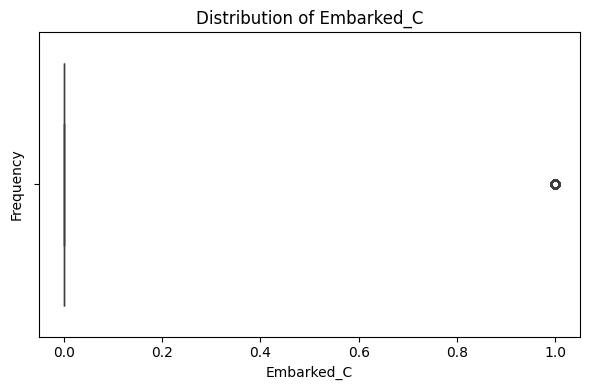

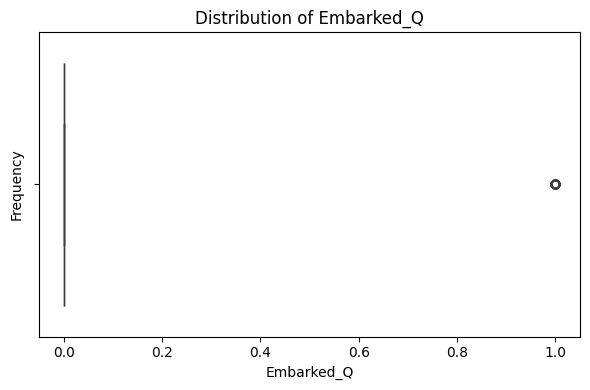

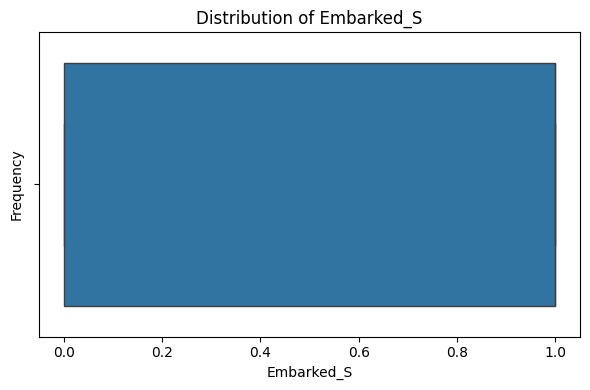

In [73]:

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


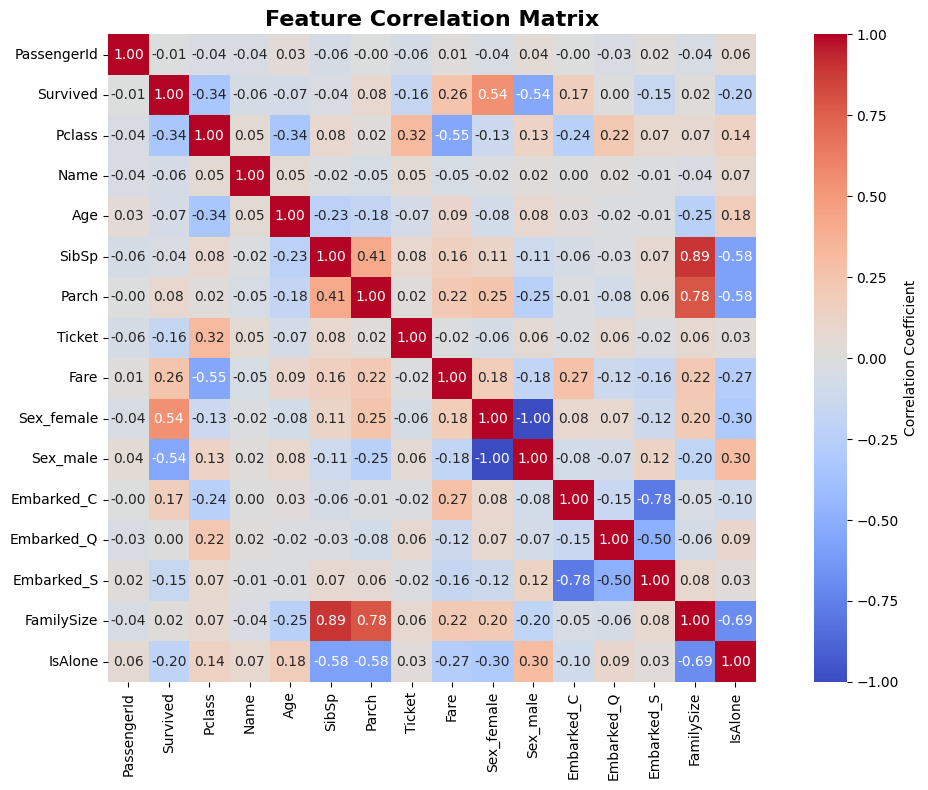

In [76]:
# Feature Correlation Matrix
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [74]:
# 2. FARE ANOMALIES AND OUTLIERS
print("\n2. FARE ANOMALIES AND OUTLIERS")
print("-" * 40)

# Basic fare statistics
fare_stats = df['Fare'].describe()
print("Fare Statistics:")
for stat, value in fare_stats.items():
    print(f"  {stat.capitalize()}: ${value:.2f}")

# Identify fare outliers using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fare_outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"\nFare Outliers Detected: {len(fare_outliers)} passengers")
print(f"  Lower bound: ${lower_bound:.2f}")
print(f"  Upper bound: ${upper_bound:.2f}")

# Zero fare anomaly
zero_fare = df[df['Fare'] == 0]
print(f"\nZero Fare Anomaly: {len(zero_fare)} passengers paid $0")
if len(zero_fare) > 0:
    print("  Classes of zero-fare passengers:", zero_fare['Pclass'].value_counts().to_dict())

# Extremely high fares
high_fare = df[df['Fare'] > 200]
print(f"\nExtremely High Fares (>$200): {len(high_fare)} passengers")
if len(high_fare) > 0:
    print("  Maximum fare paid: $", df['Fare'].max())
    print("  Classes of high-fare passengers:", high_fare['Pclass'].value_counts().to_dict())



2. FARE ANOMALIES AND OUTLIERS
----------------------------------------
Fare Statistics:
  Count: $891.00
  Mean: $31.79
  Std: $49.70
  Min: $0.00
  25%: $7.00
  50%: $14.00
  75%: $31.00
  Max: $512.00

Fare Outliers Detected: 114 passengers
  Lower bound: $-29.00
  Upper bound: $67.00

Zero Fare Anomaly: 15 passengers paid $0
  Classes of zero-fare passengers: {2: 6, 1: 5, 3: 4}

Extremely High Fares (>$200): 20 passengers
  Maximum fare paid: $ 512
  Classes of high-fare passengers: {1: 20}


In [75]:
# 3. AGE DISTRIBUTION AND PATTERNS
print("\n3. AGE DISTRIBUTION AND PATTERNS")
print("-" * 40)

# Age statistics
age_stats = df['Age'].describe()
print("Age Statistics:")
for stat, value in age_stats.items():
    print(f"  {stat.capitalize()}: {value:.1f} years")

print(f"\nMissing Age Data: {df['Age'].isnull().sum()} passengers ({df['Age'].isnull().mean():.1%})")

# Age anomalies
print("\nAge Anomalies:")
print(f"  Youngest passenger: {df['Age'].min():.1f} years")
print(f"  Oldest passenger: {df['Age'].max():.1f} years")

# Infants and elderly
infants = df[df['Age'] < 1]
elderly = df[df['Age'] > 70]
print(f"  Infants (<1 year): {len(infants)} passengers")
print(f"  Elderly (>70 years): {len(elderly)} passengers")

# 4. FAMILY SIZE TRENDS
print("\n4. FAMILY SIZE TRENDS")
print("-" * 40)

# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

family_survival = df.groupby('FamilySize')['Survived'].agg(['count', 'mean']).round(3)
print("Survival by Family Size:")
for size, stats in family_survival.iterrows():
    print(f"  Family Size {size}: {stats['count']} passengers, {stats['mean']:.1%} survival rate")

alone_survival = df.groupby('IsAlone')['Survived'].mean()
print(f"\nTraveling Alone vs. With Family:")
print(f"  Traveling Alone: {alone_survival[1]:.1%} survival rate")
print(f"  Traveling with Family: {alone_survival[0]:.1%} survival rate")



3. AGE DISTRIBUTION AND PATTERNS
----------------------------------------
Age Statistics:
  Count: 891.0 years
  Mean: 29.5 years
  Std: 13.0 years
  Min: 0.0 years
  25%: 22.0 years
  50%: 29.0 years
  75%: 35.0 years
  Max: 80.0 years

Missing Age Data: 0 passengers (0.0%)

Age Anomalies:
  Youngest passenger: 0.0 years
  Oldest passenger: 80.0 years
  Infants (<1 year): 7 passengers
  Elderly (>70 years): 4 passengers

4. FAMILY SIZE TRENDS
----------------------------------------
Survival by Family Size:
  Family Size 1: 537.0 passengers, 30.4% survival rate
  Family Size 2: 161.0 passengers, 55.3% survival rate
  Family Size 3: 102.0 passengers, 57.8% survival rate
  Family Size 4: 29.0 passengers, 72.4% survival rate
  Family Size 5: 15.0 passengers, 20.0% survival rate
  Family Size 6: 22.0 passengers, 13.6% survival rate
  Family Size 7: 12.0 passengers, 33.3% survival rate
  Family Size 8: 6.0 passengers, 0.0% survival rate
  Family Size 11: 7.0 passengers, 0.0% survival rate